# **Network**

In [0]:
# https://keras.io/

# Install Keras from python package manager and q is for quiet mode. 
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Importing packages
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
# Loading training data in X_train and y_train and testing or validation data 
# in X_test, y_test.

# X variables have the pixel value of the digits and y variables have the digit information.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


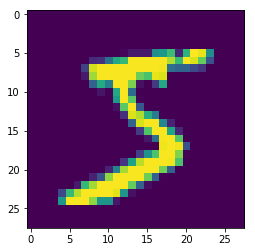

In [0]:
# Printing the shape or dimension of X_train. This will help us know the number of images in training data.
print (X_train.shape)

# Importing plotting package and to display the first image of the training dataset.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# X variable for training and testing is reshaped to 4 dimension from 3 dimension by 
# adding channel as dimension. In the case of black and white image, channel is 1.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Pixel Normalization -> Normalizing the pixel value between 0 and 1.
# Since values range from 0 to 255, dividing it by 255 to get within the value of 0 and 1.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Displaying the first ten digits
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# This is one-hot encoding,
# Converting the y values from digit to binary variable of 10 classes (0-9)
# The value is 1 for that particular digit 
# i.e. digit 5 means column number 6 will be 1 and other columns would be 0.

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Displaying y_train as one-hot encoded variables.
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Building the network.
# Adding convolution layers (# of filters and filter size), with activation as relu
# Flattening the output of the last convolution layer
# Applying softmax, to get probability-like value for 10 digit class.

from keras.layers import Activation, MaxPooling2D

model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26, RF = 3

model.add(Convolution2D(32, 3, 3, activation='relu')) # 24, RF = 5
model.add(Convolution2D(64, 3, 3, activation='relu')) # 22, RF = 7

model.add(MaxPooling2D(pool_size=(2, 2))) # 11, RF = 14
model.add(Convolution2D(16, 1, 1, activation='relu')) # 11, RF = 14

model.add(Convolution2D(32, 3, 3, activation='relu')) # 9, RF = 16
model.add(Convolution2D(64, 3, 3, activation='relu')) # 7, RF = 18

model.add(Convolution2D(10, 1, activation='relu')) #7, RF = 18
model.add(Convolution2D(10, 7)), #1,  RF = 24

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

W0614 22:57:15.052733 139841005135744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
W0614 22:57:15.097355 139841005135744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 22:57:15.104907 139841005135744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Upda

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        1040      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          18496     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  app.launch_new_instance()


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0614 22:57:19.225905 139841005135744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 22:57:19.254981 139841005135744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=5, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0614 22:57:23.593055 139841005135744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0614 22:57:23.671390 139841005135744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 17s 287us/step - loss: 0.1600 - acc: 0.9504
Epoch 2/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.0513 - acc: 0.9848
Epoch 3/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.0394 - acc: 0.9876
Epoch 4/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.0324 - acc: 0.9896
Epoch 5/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.0267 - acc: 0.9914


In [0]:
# Model is evaluated on the testing dataset.
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
# The score prints the loss and the test accuracy.
print(score)

[0.045596925891166026, 0.9867]


In [0]:
#print(model.metrics_names)

In [0]:
# Prediction of the test images.
y_pred = model.predict(X_test)

In [0]:
# Shows the predicted y value from the model - probability of the digit.
# Model has not learnt anything as the default probability is 0.1
print(y_pred[:9])

# Prints the actual digit for y_test dataset.
print(y_test[:9])

[[5.3848036e-14 5.3208766e-12 1.3940604e-10 1.5598450e-10 9.4307715e-20
  2.1425697e-13 1.3223205e-23 1.0000000e+00 1.1656824e-12 7.1144592e-12]
 [1.0916011e-06 1.6755914e-07 9.9999833e-01 3.2097787e-09 5.5327770e-11
  5.9394575e-16 3.9064514e-07 6.1341658e-14 1.8055685e-08 1.8769505e-15]
 [5.8214211e-10 9.9999857e-01 1.8441716e-08 7.9825296e-12 4.3393831e-07
  8.6507612e-10 1.6896331e-08 3.8863622e-08 1.0034986e-06 2.2626563e-09]
 [9.9998868e-01 2.6332609e-09 1.2665559e-08 3.9871415e-10 4.0138497e-09
  7.3130160e-09 1.1045901e-05 1.7455256e-09 5.2940621e-08 1.5789948e-07]
 [1.4596416e-19 2.8157685e-17 3.4384366e-13 6.9982623e-18 1.0000000e+00
  3.9193829e-19 5.3700754e-14 6.7945514e-14 5.3243187e-12 3.7301128e-08]
 [2.9612986e-11 9.9999928e-01 2.8103269e-09 1.7740919e-12 5.9467794e-07
  5.6394295e-12 2.5547242e-10 1.4345487e-08 1.0393036e-07 1.0294321e-09]
 [1.4136281e-20 2.7594546e-11 1.1547914e-12 1.7544926e-17 9.9999738e-01
  2.5583078e-14 1.9512246e-17 2.1475054e-10 2.6745340e-06 